In [2]:
import cv2
import numpy as np
import torch
import easyocr
%matplotlib inline
import matplotlib.pyplot as plt
import imutils
reader = easyocr.Reader(['en'])

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
licensePlateModel = torch.hub.load(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\yolov5', 'custom', path=r'E:\IAMDAT\Workplace\DOANCUOIKY\FinalVersion\models\best_lp_4.pt', source='local').to(device)

YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 


In [5]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\LisencePlateRecognition\sub_images\42.jpg')

def get_plate(img):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
    bbox = bbox[bbox[:,5]==max(bbox[:,5])][0]
    xmin, ymin, xmax, ymax = bbox[0:4]
    img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	
    return img_license_plate

def GDS(arr):
    gds = []
    mean = np.mean(arr)
    std = np.std(arr)
    th=3
    new_arr = [arr[0]]*th + list(arr.copy()) + [arr[-1]]*th
    print(len(new_arr))
    print(len(arr))
    p_max, p_min = mean+std, mean-std
    for i in range(th, len(new_arr)-th):
        if ((new_arr[i]<np.mean(new_arr[i-th:i]) and new_arr[i]>np.mean(new_arr[i:i+th])) or (new_arr[i]>np.mean(new_arr[i-th:i]) and new_arr[i]<np.mean(new_arr[i:i+th]))) and new_arr[i]<= p_max and new_arr[i]>=p_min:
            gds.append(i-th)
    return gds 
def getHandelArea(arr):
    gds = [0,0]
    mean = np.mean(arr)
    std = np.std(arr)
    th = 1
    p_max, p_min = mean+std, mean-std

    for i in range(th, len(arr)-th):
        
        if  (arr[i-th]>arr[i] and arr[i+th]<arr[i]) and arr[i]<= p_max and arr[i]>=p_min:
            if gds[0]==0:
                gds[0] = i
            else:
                gds[1] = i
    return gds
def applySummFunctin(img, axis = 1):
    res = np.sum(img, axis = axis)    #  summ elements in columns
    return res


# def get_plate(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
#     bbox = bbox[bbox[:,5]==max(bbox[:,5])][0]
#     xmin, ymin, xmax, ymax = bbox[0:4]
#     img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	


#     sum_1 = applySummFunctin(img_license_plate, axis =1)
#     sum_0 = applySummFunctin(img_license_plate, axis =0)
#     gds1 = GDS(sum_1)
#     gds0 = GDS(sum_0)
#     sub = img_license_plate[ gds1[0]:gds1[-1], gds0[0]:gds0[-1]]
    
#     print(reader.readtext(img_license_plate))
#     return img_license_plate

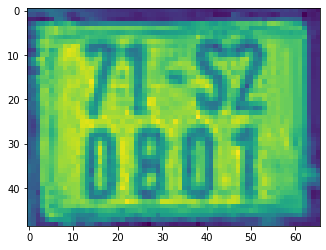

In [6]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\LisencePlateRecognition\sub_images\42.jpg')

plt.imshow(get_plate(img))

In [7]:
i = 6
vehicle =  cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\LisencePlateRecognition\sub_images\42.jpg')
plate = get_plate(vehicle)
from sklearn.cluster import KMeans

# model = KMeans(n_clusters=2).fit(plate.reshape((-1,1)))
# plate = model.predict(plate.reshape((-1,1))).reshape(plate.shape)
# if model.cluster_centers_[0]>model.cluster_centers_[1]:
#     plate = 1-plate
# plt.imshow(plate,'gray')



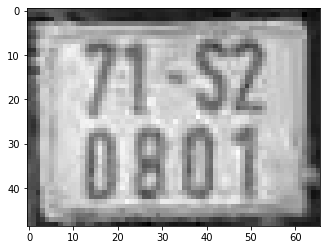

In [8]:
plt.imshow(plate,'gray')

In [9]:
reader.readtext(plate)


[([[8, 4], [56, 4], [56, 30], [8, 30]], '71-52', 0.33646276442244116),
 ([[8, 22], [56, 22], [56, 46], [8, 46]], '0801', 0.2850186228752136)]

In [10]:
sum_1 = applySummFunctin(plate, axis =1)
sum_0 = applySummFunctin(plate, axis =0)

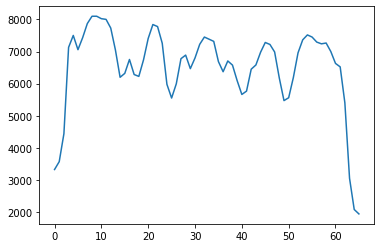

In [11]:
plt.plot(sum_0)

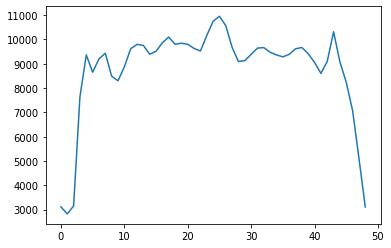

In [12]:
plt.plot(sum_1)

In [13]:
sum_1 = applySummFunctin(plate, axis =1)
sum_0 = applySummFunctin(plate, axis =0)
gds1 = GDS(sum_1)
gds0 = GDS(sum_0)
sub = plate[ gds1[0]:gds1[-1], gds0[0]:gds0[-1]]


55
49
72
66


In [14]:
[1,2]*2+[1,2,3]

[1, 2, 1, 2, 1, 2, 3]

In [15]:
gds1

[3, 5, 10, 11, 16, 19, 20, 23, 26, 27, 30, 33, 34, 36, 39, 40, 42, 44, 45, 46]

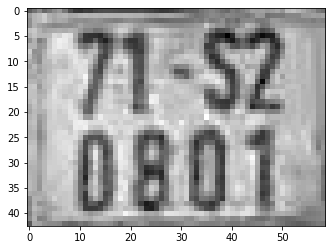

In [16]:
plt.imshow(sub, 'gray')

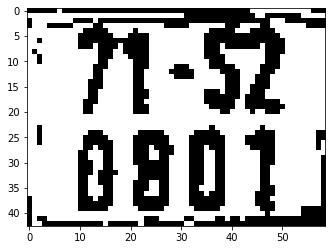

In [17]:
def change_to_binary(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict
    return predict


binary = change_to_binary(sub)
plt.imshow(binary,'gray')



In [18]:
numberLoc = np.where(binary==1)
numberLoc
x_train = np.concatenate([numberLoc[0].reshape((-1,1)), numberLoc[1].reshape((-1,1))], axis = 1)
x_train.shape


(1673, 2)

In [19]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(x_train)
predict = kmeans.predict(x_train)

In [20]:
cls1 = x_train[predict==2]

In [21]:
x1,y1,x2,y2 = np.min(cls1[0]),np.min(cls1[1]),np.max(cls1[0]),np.max(cls1[1])

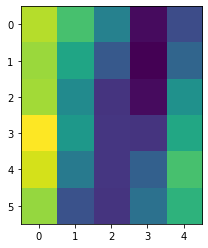

In [22]:
plt.imshow(sub[x1:x2, y1:y2])

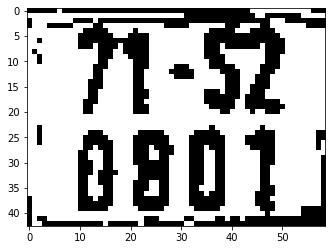

In [23]:
# binary[binary!=0] = 1.
plt.imshow(binary,'gray')

In [24]:
reader.readtext(sub)

[([[6, 0], [54, 0], [54, 26], [6, 26]], '71352', 0.42360143657093596),
 ([[4, 20], [52, 20], [52, 43], [4, 43]], 'ob01', 0.6023659706115723)]

In [25]:
from sklearn.cluster import KMeans


def splitLine(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict

    s1 = applySummFunctin(img, axis =1)
    lst_max = np.where(s1== max(s1))[0]
    deadline = lst_max[int(len(lst_max)/2)]
    if deadline<(1/3)*len(s1) - deadline or deadline>(1/3)*len(s1) - deadline :
        deadline = int(len(s1)/2)
    line1 = predict[0:deadline,:]
    line2 = predict[deadline:-1,:]
    return line1, line2

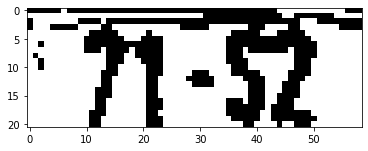

In [26]:
l1,l2 = splitLine(sub)
plt.imshow(l1,'gray')

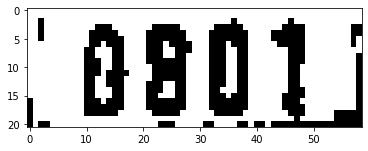

In [27]:
plt.imshow(l2,'gray')

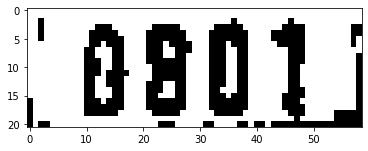

In [28]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=2).fit(l2.reshape((-1,1)))
binary = model.predict(l2.reshape(-1,1)).reshape(l2.shape)
if model.cluster_centers_[0]>model.cluster_centers_[1]:
    binary = 1-binary
plt.imshow(binary,'gray')


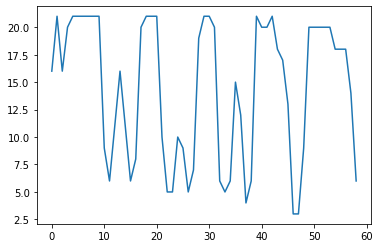

In [29]:
s0 = applySummFunctin(binary, axis =0)
plt.plot(s0)

C:\Users\CaoDat\AppData\Local\Temp\ipykernel_11756\1828316513.py:1: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(binary[:,80:98])


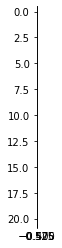

In [30]:
plt.imshow(binary[:,80:98])

In [31]:
def get_location_of_char(arr):
    locations = []
    lst = []
    max= np.max(arr)
    arr_tf =  arr>max-3 
    print(max)
    print(arr)
    print(arr_tf)
    print(len(arr_tf))
    for i in range(len(arr_tf)):
        if arr_tf[i]==False and i!=len(arr_tf)-1:
            lst.append(i)
        elif arr_tf[i]==True:
            if len(lst)<3:
                lst = []
            else:
                locations.append([lst[0], lst[-1]])
                lst = []
        else:
            lst.append(i)
            locations.append([lst[0], lst[-1]])
            lst = []
    return locations


In [32]:
gds = get_location_of_char(s0)
gds


21
[16 21 16 20 21 21 21 21 21 21  9  6 11 16 11  6  8 20 21 21 21 10  5  5 10  9  5  7 19 21 21 20  6  5  6 15 12  4  6 21 20 20 21 18 17 13  3  3  9 20 20 20 20 20 18 18 18 14  6]
[False  True False  True  True  True  True  True  True  True False False False False False False False  True  True  True  True False False False False False False False  True  True  True  True False False False False False False False  True  True  True  True False False False False False False  True  True  True  True
  True False False False False False]
59


[[10, 16], [21, 27], [32, 38], [43, 48], [54, 58]]

In [33]:
chars = []
for i in gds:
    chars.append(l2[:,i[0]-1:i[1]+1]) 

In [34]:
plt.imshow(chars[5],'gray')

IndexError: list index out of range

In [107]:

from sklearn.cluster import KMeans
import cv2
import numpy as np
import torch
import logging

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
licensePlateModel = torch.hub.load(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\yolov5', 'custom', path=r'E:\IAMDAT\Workplace\DOANCUOIKY\FinalVersion\models\best_lp_2.pt', source='local').to(device)

img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\DesktopApp\core\images\vehicle\1649952038.7674325.jpg')



# def GDS(arr):
#     gds = []
#     mean = np.mean(arr)
#     std = np.std(arr)
#     th=3
#     new_arr = [arr[0]]*th + list(arr.copy()) + [arr[-1]]*th
#     p_max, p_min = mean+std, mean-std
#     for i in range(th, len(new_arr)-th):
#         if ((new_arr[i]<np.mean(new_arr[i-th:i]) and new_arr[i]>np.mean(new_arr[i:i+th])) or (new_arr[i]>np.mean(new_arr[i-th:i]) and new_arr[i]<np.mean(new_arr[i:i+th]))) and new_arr[i]<= p_max and new_arr[i]>=p_min:
#             gds.append(i-th)
#     return gds 

# def GDS(arr):
#     gds = []
#     mean = np.mean(arr)
#     std = np.std(arr)
#     th=3
#     new_arr = [arr[0]]*th + list(arr.copy()) + [arr[-1]]*th
#     p_max, p_min = mean+std, mean-std
#     for i in range(th, len(new_arr)-th):
#         if ((new_arr[i]<np.mean(new_arr[i-th:i]) and new_arr[i]>np.mean(new_arr[i:i+th])) or (new_arr[i]>np.mean(new_arr[i-th:i]) and new_arr[i]<np.mean(new_arr[i:i+th]))) and new_arr[i]<= p_max and new_arr[i]>=p_min:
#             gds.append(i-th)
#     return gds 


def GDS(arr):
    gds = []
    mean = np.mean(arr)
    std = np.std(arr)
    th=3
    p_max, p_min = mean+std, mean-std
    for i in range(th, len(arr)-th):
        if ((arr[i]<np.mean(arr[i-th:i]) and arr[i]>np.mean(arr[i:i+th])) or (arr[i]>np.mean(arr[i-th:i]) and arr[i]<np.mean(arr[i:i+th]))) and arr[i]<= p_max and arr[i]>=p_min:
            gds.append(i)
    return gds

def applySummFunctin(img, axis = 1):
    res = np.sum(img, axis = axis)    #  summ elements in columns
    return res

def get_plate(img):
    err=  None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
    if len(bbox) == 0:
        err = 'Can\'t detect license plate'
        logging.exception(err)
        return None, err
    bbox = bbox[bbox[:,5]==np.max(bbox[:,5])][0]
    xmin, ymin, xmax, ymax = bbox[0:4]
    img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	
    return img_license_plate, err





def change_to_binary(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict
    return predict

# def splitLine(img):
    
#     predict = change_to_binary(img)
#     s1 = applySummFunctin(img, axis =1)
#     lst_max = np.where(s1== max(s1))[0]
#     deadline = lst_max[int(len(lst_max)/2)]
#     line1_binary = predict[0:deadline,:]
#     line2_binary = predict[deadline:-1,:]
#     line1  = img[0:deadline,:]
#     line2 = img[deadline:-1,:]
#     return [line1, line2],[line1_binary, line2_binary]


def splitLine(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict

    s1 = applySummFunctin(img, axis =1)
    lst_max = np.where(s1== max(s1))[0]
    deadline = lst_max[int(len(lst_max)/2)]
    if deadline<(1/3)*len(s1) - deadline or deadline>(1/3)*len(s1) - deadline :
        deadline = int(len(s1)/2)

    
    

    line1 = img[0:deadline,:]
    sum01 = applySummFunctin(line1, axis =0)
    gds01 = GDS(sum01)
    line1 = line1[ :, gds01[0]:gds01[-1]]

    line2 = img[deadline:-1,:]
    sum02 = applySummFunctin(line2, axis =0)
    gds02 = GDS(sum02)
    line2 = line2[ :, gds02[0]:gds02[-1]]



    line1_binary = predict[0:deadline,gds01[0]:gds01[-1]]
    line2_binary = predict[deadline:-1,gds02[0]:gds02[-1]]
    return [line1, line2],[line1_binary, line2_binary]


def get_location_of_char(line):

    arr = applySummFunctin(line, axis =0)
    locations = []
    lst = []

    mean = np.mean(arr)
    arr_tf =  arr>= mean 
    for i in range(len(arr_tf)):
        if arr_tf[i]==False and i!=len(arr_tf)-1:
            lst.append(i)

        elif arr_tf[i]==True:
            if  i!=len(arr_tf)-1 and arr_tf[i+1]==False and len(lst)<len(arr)/10:
                continue
            if len(lst)<4:
                lst = []
            else:
                locations.append([lst[0], lst[-1]])
                lst = []
        else:
            lst.append(i)
            locations.append([lst[0], lst[-1]])
            lst = []

    return locations

def getCharInPlate(img):
    chars= []
    plate, err = get_plate(img)
    if err != None:
        return chars
    sum_1 = applySummFunctin(plate, axis =1)
    # sum_0 = applySummFunctin(plate, axis =0)
    gds1 = GDS(sum_1)
    # gds0 = GDS(sum_0)
    sub = plate[ gds1[0]:gds1[-1],:]
    if (sub.shape[0]/sub.shape[1])>(1/3):
        lines, lines_b = splitLine(sub)
    else:
        lines, lines_b = [sub],[change_to_binary(sub)]
    for ind in range(len(lines)):
        # s0 = applySummFunctin(, axis =0)

        gds = get_location_of_char(lines_b[ind])
        for i in gds:
            if i[0]>2:
                img_line = lines[ind][:,i[0]-2:i[1]+2]
            else:
                img_line = lines[ind][:,i[0]:i[1]]
            scale_percent = 400 # percent of original size
            width = int(img_line.shape[1] * scale_percent / 100)
            height = int(img_line.shape[0] * scale_percent / 100)
            dim = (width, height)
            # resize image
            resized = cv2.resize(img_line, dim, interpolation = cv2.INTER_AREA)
            chars.append(resized)
    return chars


YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 


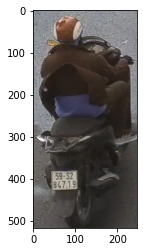

In [108]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\DesktopApp\core\images\vehicle\1649952038.7674325.jpg')
plt.imshow(img)

In [109]:
len(getCharInPlate(img))

8

[False False  True  True  True  True  True  True  True  True  True  True False False  True  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False]
[15 15 16 16 16 16 16 16 16 16 16 16 15 15 16 16  8  6  6  6  8  9  5  6 12 15  5  3  1 11 10  7  1  3 12 13  1  1  6  6  6  5 10 11 13 14 14 15 14 14 14 14 14 14 14 14]
10.946428571428571
[False False False False False False  True  True False False False False False False False  True  True False False False False False False False  True  True False False  True  True  True False False False False False False False  True  True  True False False False False False False]
[13 14 14 12  5 13 17 17  6  6 13 14 14  6  6 18 18 14 12 10 11  9  8 12 16 17 14 13 16 16 16 13 12 11 11 10 12 14 16 17 17 10 12 13 12  8  5]
12.404255319148936


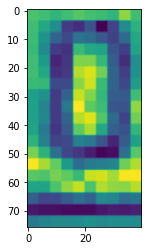

In [106]:
plt.imshow(getCharInPlate(img)[2])

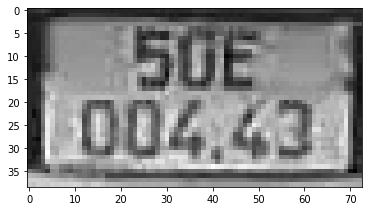

In [47]:
plate, err = get_plate(img)
plt.imshow(plate,'gray')

[3, 5, 9, 11, 12, 17, 22, 23, 27, 28, 29, 31]


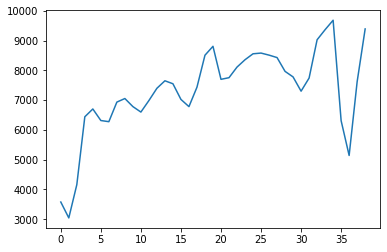

In [48]:
sum_1 = applySummFunctin(plate, axis =1)
# sum_0 = applySummFunctin(plate, axis =0)
gds1 = GDS(sum_1)
# gds0 = GDS(sum_0)
plt.plot(sum_1)
print(gds1)

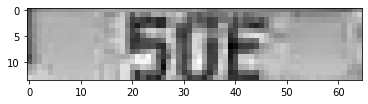

In [49]:

chars= []



sub = plate[ gds1[0]:gds1[-1],:]
if (sub.shape[0]/sub.shape[1])>(1/3):
    lines, lines_b = splitLine(sub)
else:
    lines, lines_b = [sub],[change_to_binary(sub)]

plt.imshow(lines[0],'gray')


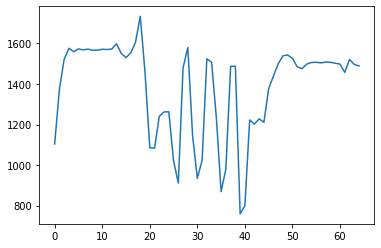

In [50]:
line = lines[0]
sum01 = applySummFunctin(line, axis =0)
gds01 = GDS(sum01)
plt.plot(sum01)

In [51]:
gds01

[4, 11, 12, 14, 19, 22, 34, 42, 43, 45, 46, 47, 50, 53, 56, 59, 60]

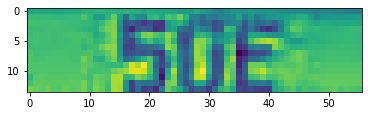

In [52]:
line1 = line[ :, gds01[0]:gds01[-1]]
plt.imshow(line1)

In [53]:
# def clear_horizontal(line):
    

In [57]:
line = lines[1]
arr = applySummFunctin(line, axis =0)
locations = []
lst = []

mean = np.mean(arr)
arr_tf =  arr<= mean 
for i in range(len(arr_tf)):
    if arr_tf[i]==False and i!=len(arr_tf)-1:
        lst.append(i)

    elif arr_tf[i]==True:
        if  i!=len(arr_tf)-1 and arr_tf[i+1]==False and len(lst)<len(arr)/10:
            continue
        if len(lst)<4:
            lst = []
        else:
            locations.append([lst[0], lst[-1]])
            lst = []
    else:
        lst.append(i)
        locations.append([lst[0], lst[-1]])
        lst = []

In [59]:
lst

[]

In [58]:
import matplotlib.pyplot as plt

plate = getCharInPlate(img)

plt.figure(figsize=(15,15))
for i in range(9):
    if i>=len(plate):
        break
    img = plate[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img,'gray')

error: OpenCV(4.5.4) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x694991f6::Set<1,-1,-1>,struct cv::impl::A0x694991f6::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [33]:
plt.imshow(getCharInPlate(img)[5],'gray')
img.shape

error: OpenCV(4.5.4) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x694991f6::Set<1,-1,-1>,struct cv::impl::A0x694991f6::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
plt.imshow(img)

In [ ]:
from torch import nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #40 40
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 31)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))#6 20 20
        x = self.pool(F.relu(self.conv2(x)))# 16 10 10
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

net.load_state_dict(torch.load(r'E:\IAMDAT\Workplace\DOANCUOIKY\FinalVersion\models\classification1.pth'))
net.eval()

def predict():
    



In [ ]:
# plt.imshow(getCharInPlate(img)[5],'gray')

import os
import time

t= []
def getCharInPlateForSave(img, path_save):
    chars= []
    plate, err = get_plate(img)
    if err != None:
        return chars, err
    sum_1 = applySummFunctin(plate, axis =1)
    sum_0 = applySummFunctin(plate, axis =0)
    gds1 = GDS(sum_1)
    gds0 = GDS(sum_0)
    sub = plate[ gds1[0]:gds1[-1], gds0[0]:gds0[-1]]
    if (sub.shape[0]/sub.shape[1])>(1/3):
        lines, lines_b = splitLine(sub)
    else:
        lines, lines_b = [sub],[change_to_binary(sub)]
    for ind in range(len(lines)):
        gds = get_location_of_char(lines_b[ind])
        for i in gds:
            if i[0]>3:
                img_line = lines[ind][:,i[0]-3:i[1]+3]
            elif i[0]>2:
                img_line = lines[ind][:,i[0]-2:i[1]+2]
            else:
                img_line = lines[ind][:,i[0]:i[1]]
            scale_percent = 400 # percent of original size
            width = int(img_line.shape[1] * scale_percent / 100)
            height = int(img_line.shape[0] * scale_percent / 100)
            dim = (width, height)
            # resize image
            resized = cv2.resize(img_line, dim, interpolation = cv2.INTER_AREA)
            path = path_save+str(time.time()).replace('.','')+'.jpg'
            cv2.imwrite(path, resized)
            chars.append(lines[ind][:,i[0]-2:i[1]+2]) 
    return chars, None




lisr_dir = [os.path.join('../images/vehicle',i) for i in os.listdir('../images/vehicle')]
img = cv2.imread(lisr_dir[0])
for i in lisr_dir:
    img = cv2.imread(i)
    _, err = getCharInPlateForSave(img,'../images/data/')
    if err != None:
        print(i)
    


In [ ]:
np.mean(np.array(t),0)

In [ ]:
s = '0123456789ABCDEFGHKLMNPRSTUVXYZ'  

for i in s:
    path = os.path.join('../images/New folder', i)
    os.mkdir(path)

In [ ]:
for i in range(10):
    print(i)
    if i==5:
        i-=1

In [ ]:
img = cv2.imread(r'E:\IAMDAT\IUH\KyThuatLapTrinh\code\KiemTraThucHanhII\The-figure-shows-some-training-and-testing-samples-from-the-Multi-Style-License-Plate.png')
plt.imshow(img)

In [ ]:
s = '0123456789ABCDEFGHKLMNPRSTUVXYZ'
for i in s[19:]:
    print(i)

In [ ]:
len(s)

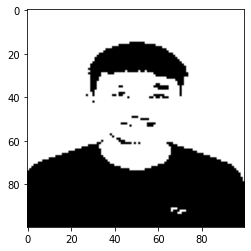

In [2]:
from colored import fg
import time 
import random
import sys
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
color = fg('green')
# print ( + 'Hello World !!!')  

img = cv2.imread(r'C:\Users\CaoDat\Desktop\MP9WBe7plteP39fUpEfr_62125223bc36d_cvtpl.jpg')
img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),(100,100))
def change_to_binary(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict
    return predict


binary = change_to_binary(img)
plt.imshow(binary,'gray')


# for i in range(binary.shape[0]):
#     line = ''
#     for j in range(binary.shape[1]):
#         line += str(int(binary[i,j]))
#         sys.stdout.write(color+line)
#         sys.stdout.flush()
#     print(color +line)



In [ ]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\DesktopApp\core\images\vehicle\1649857033.9848611.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))